   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
id      

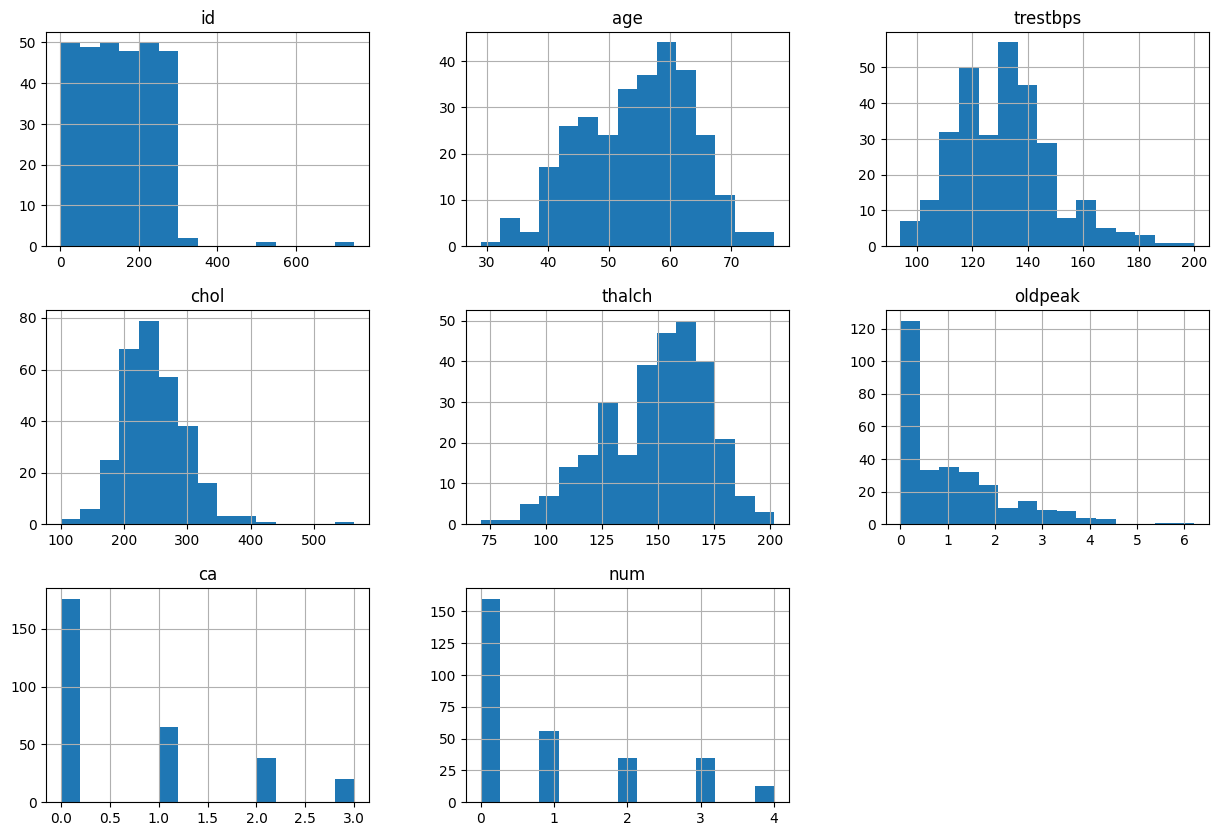

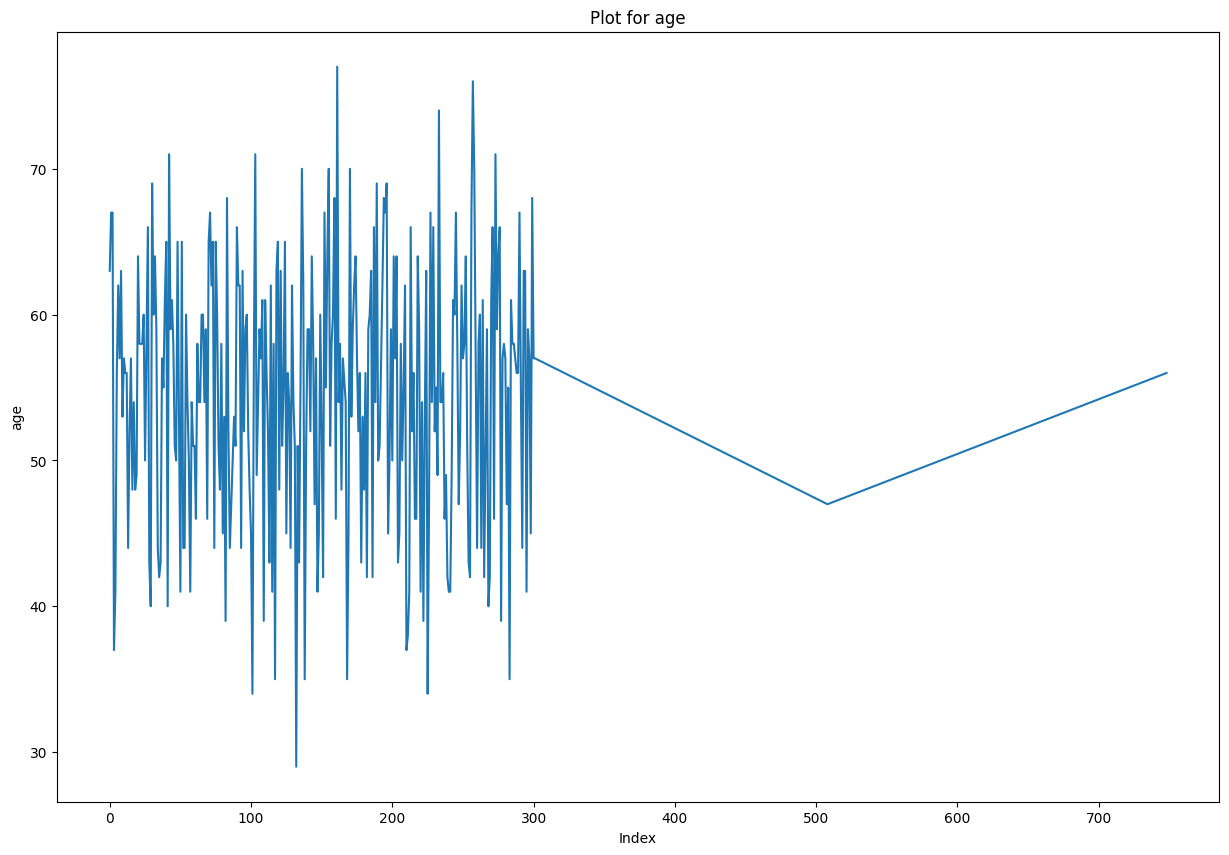

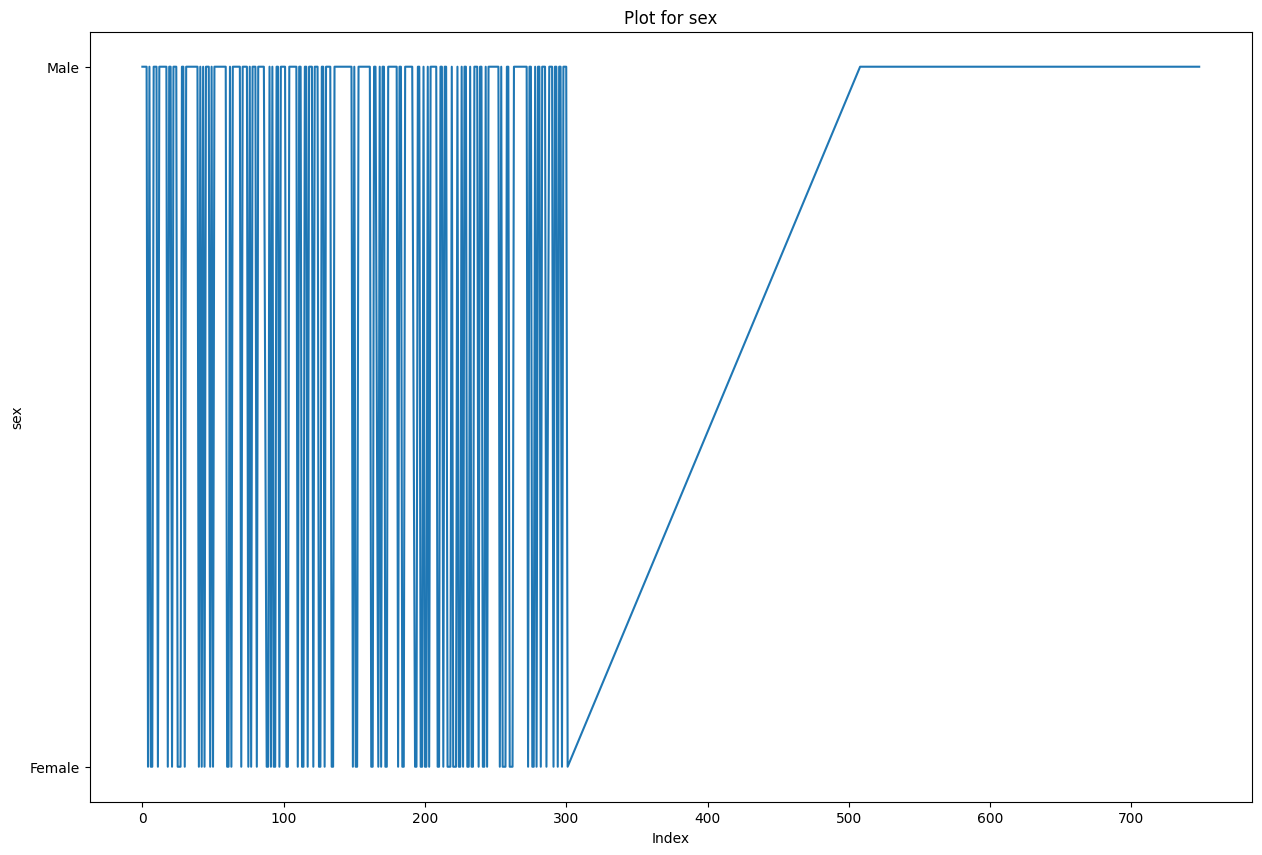

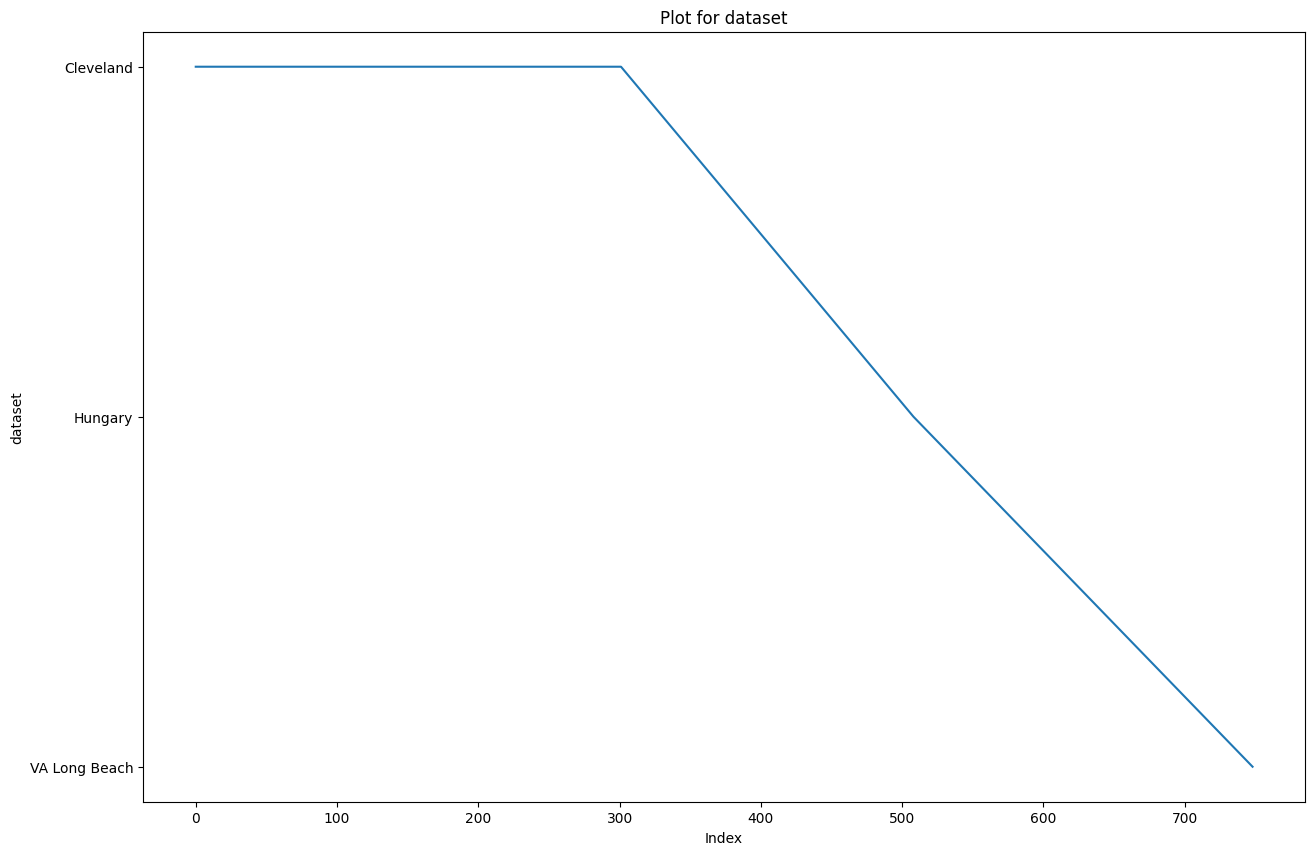

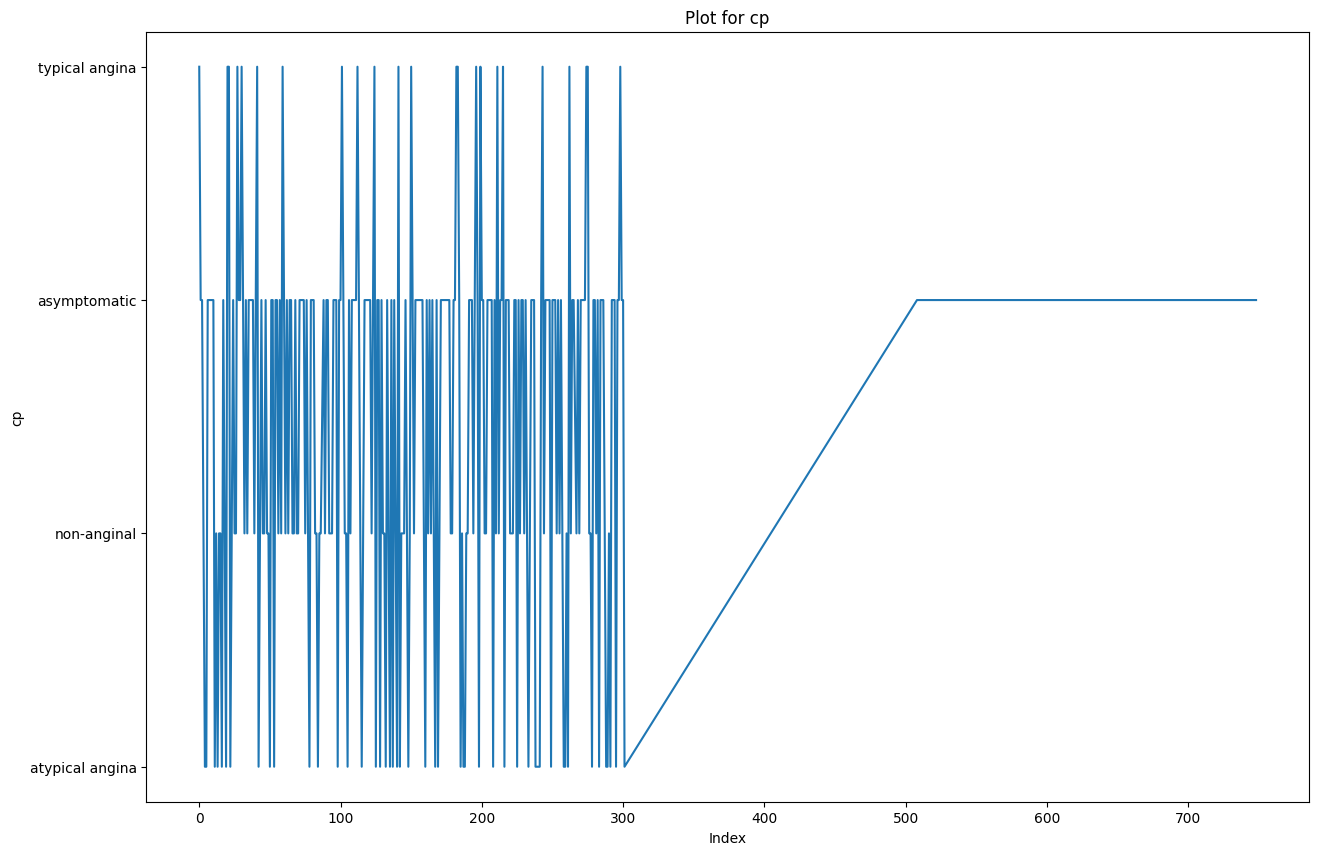

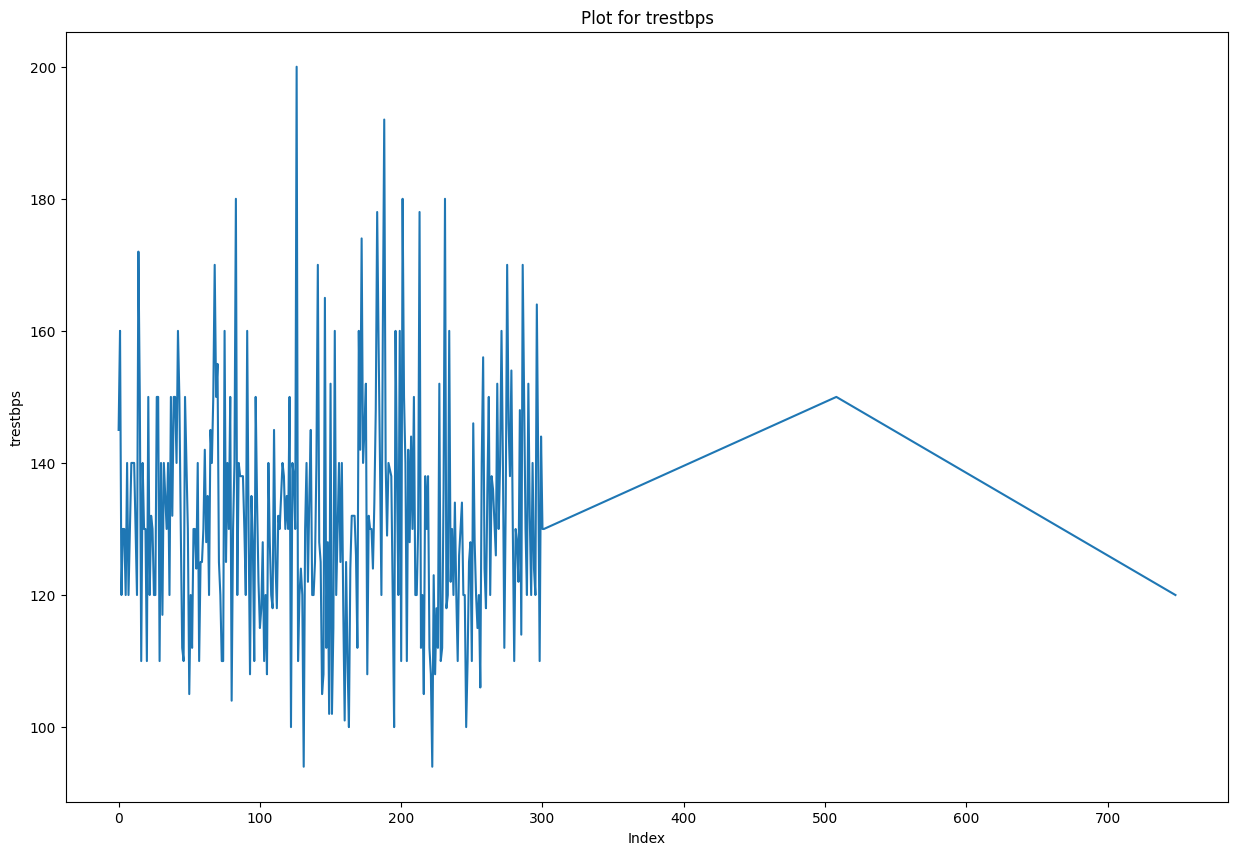

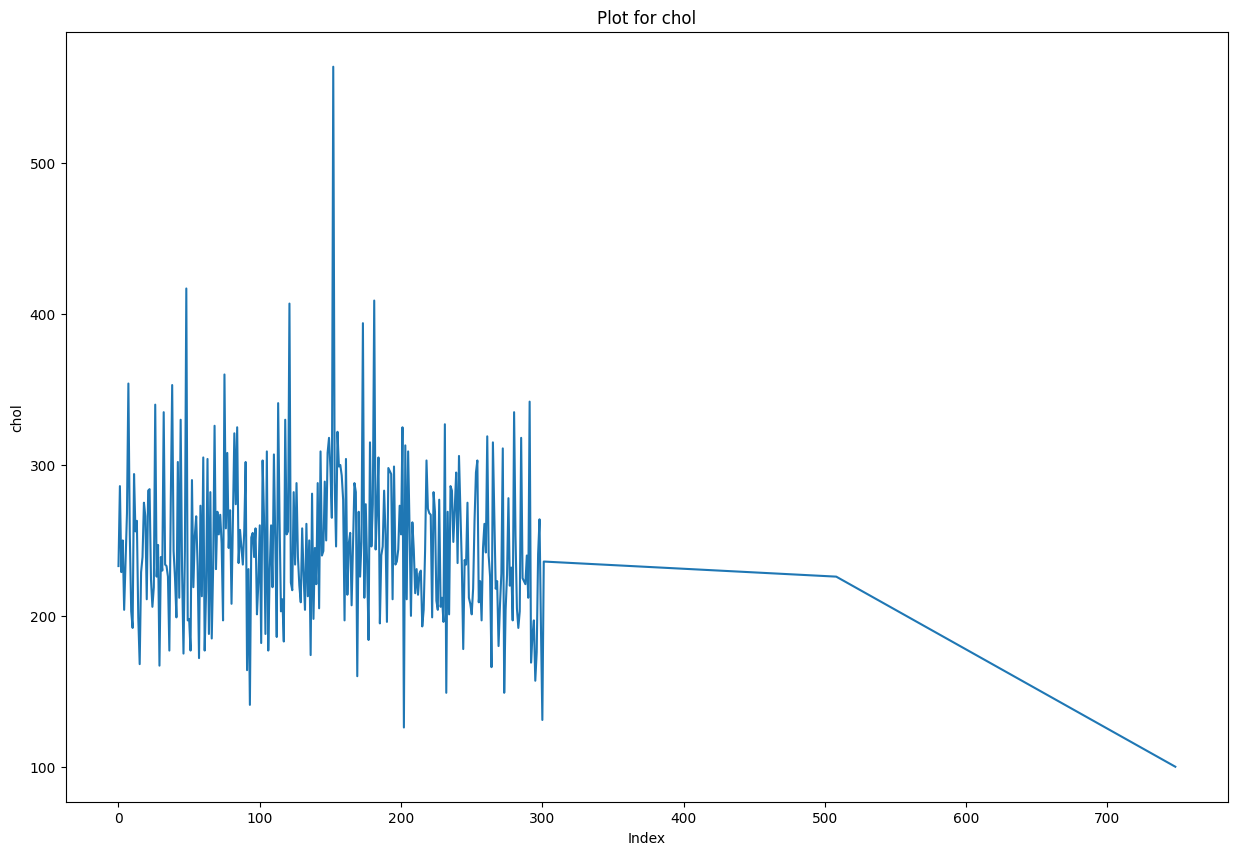

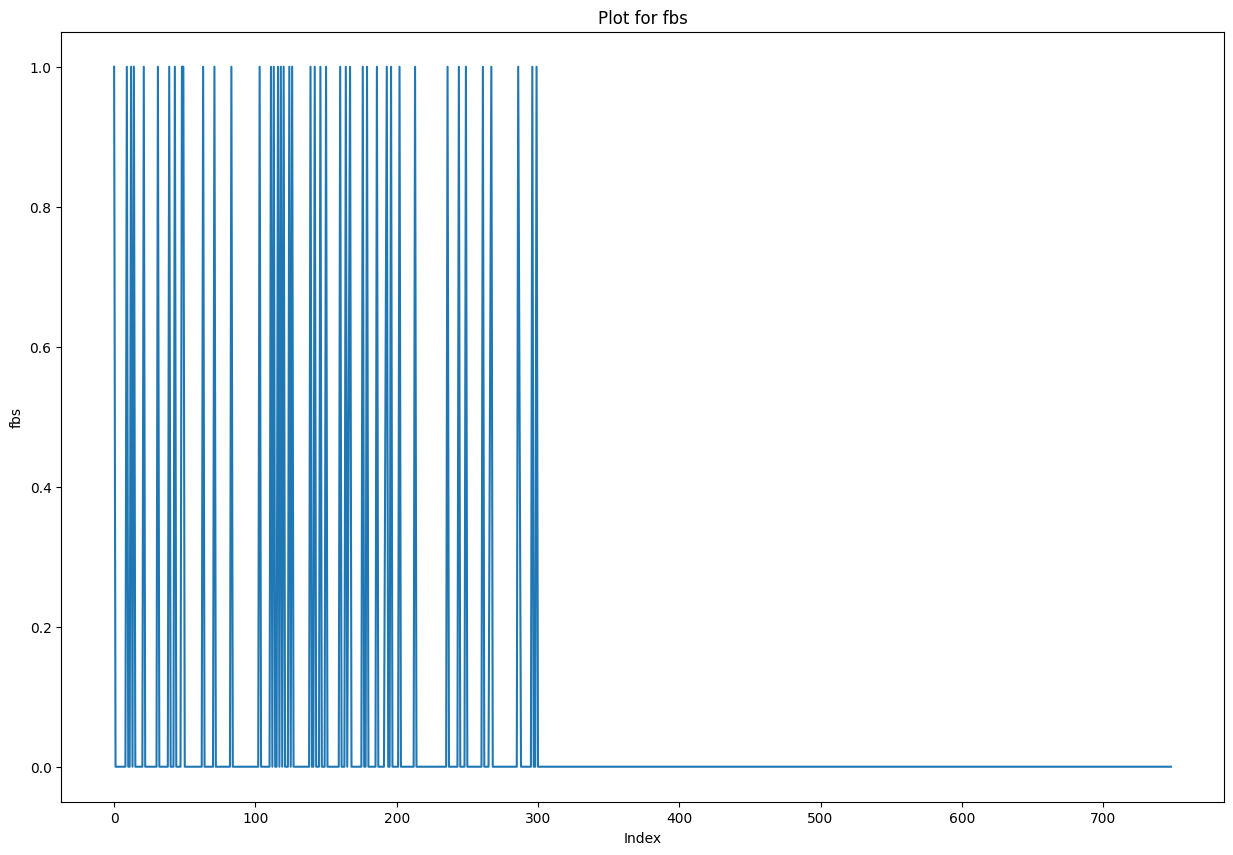

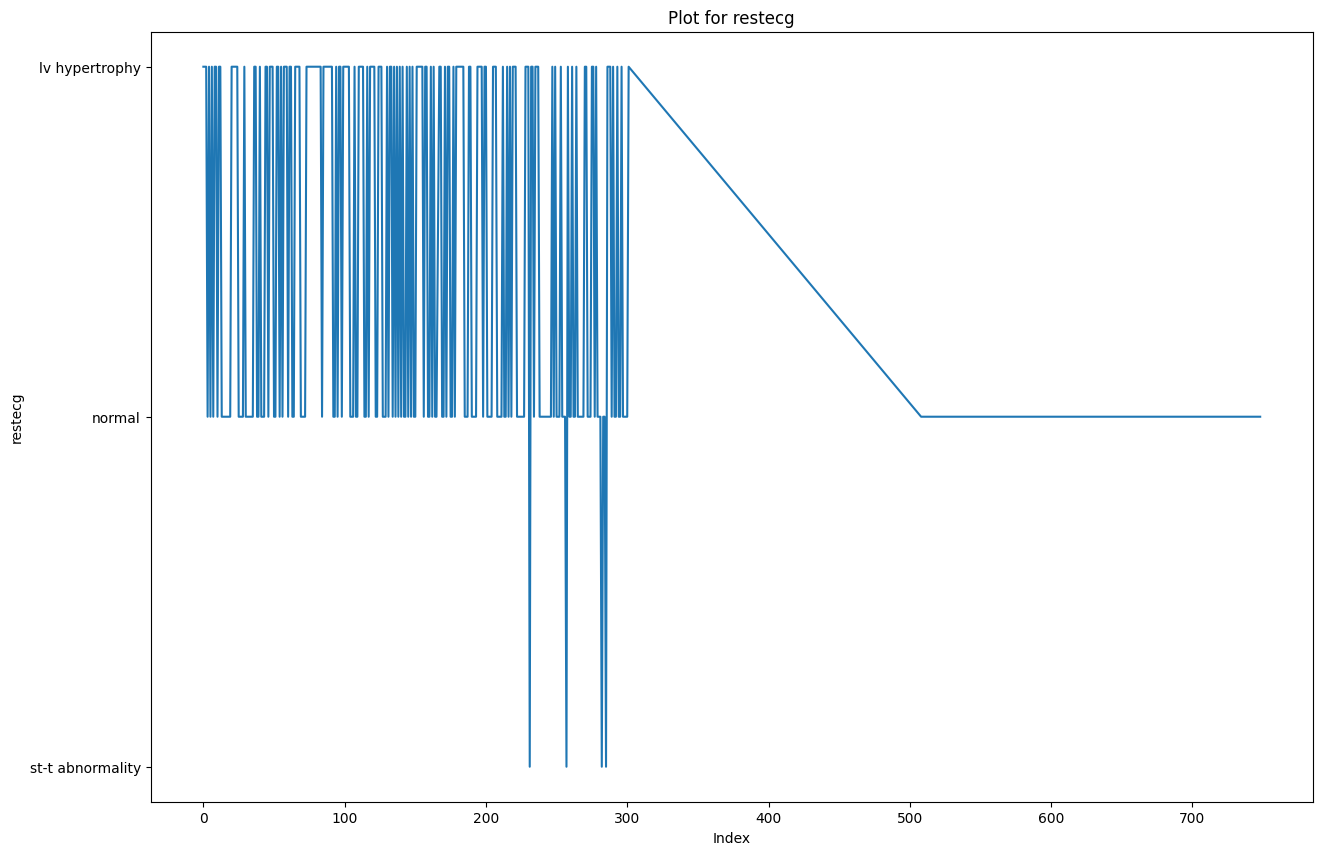

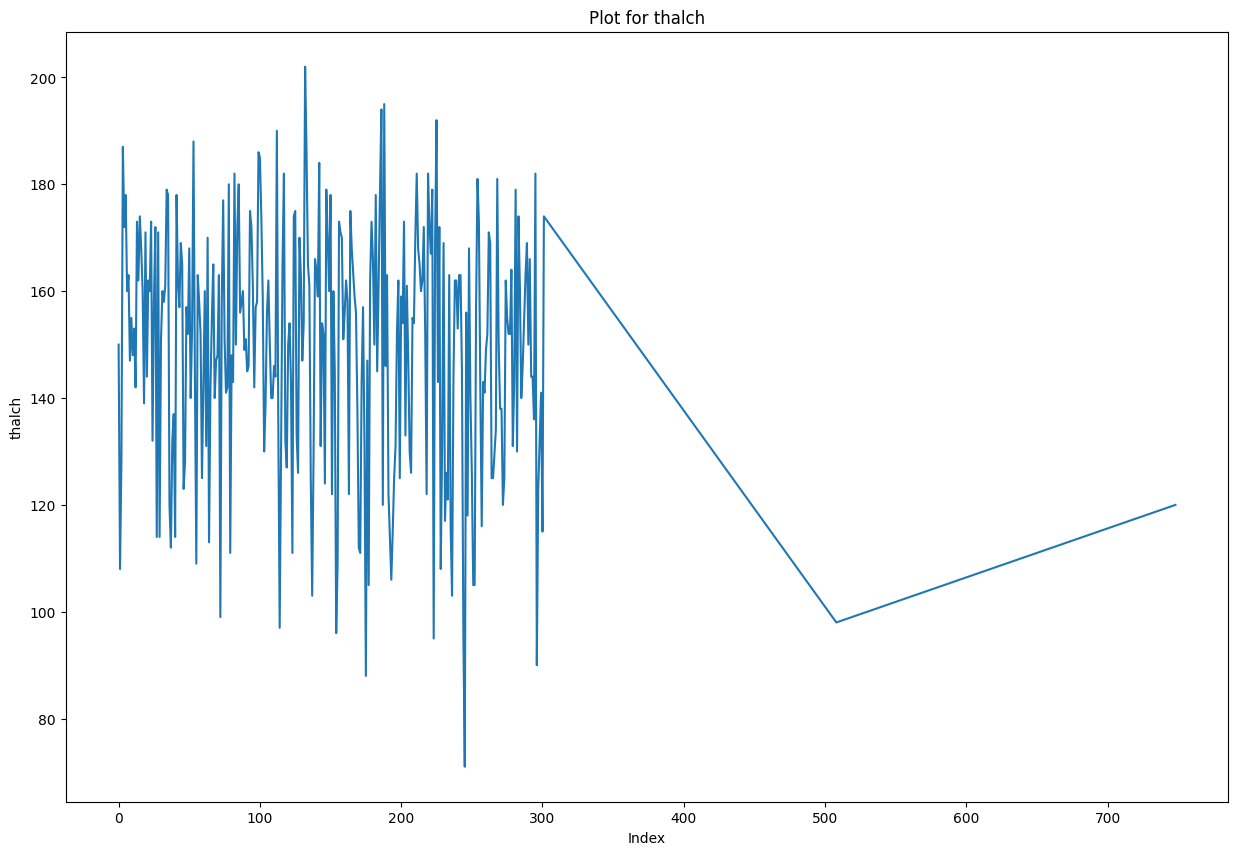

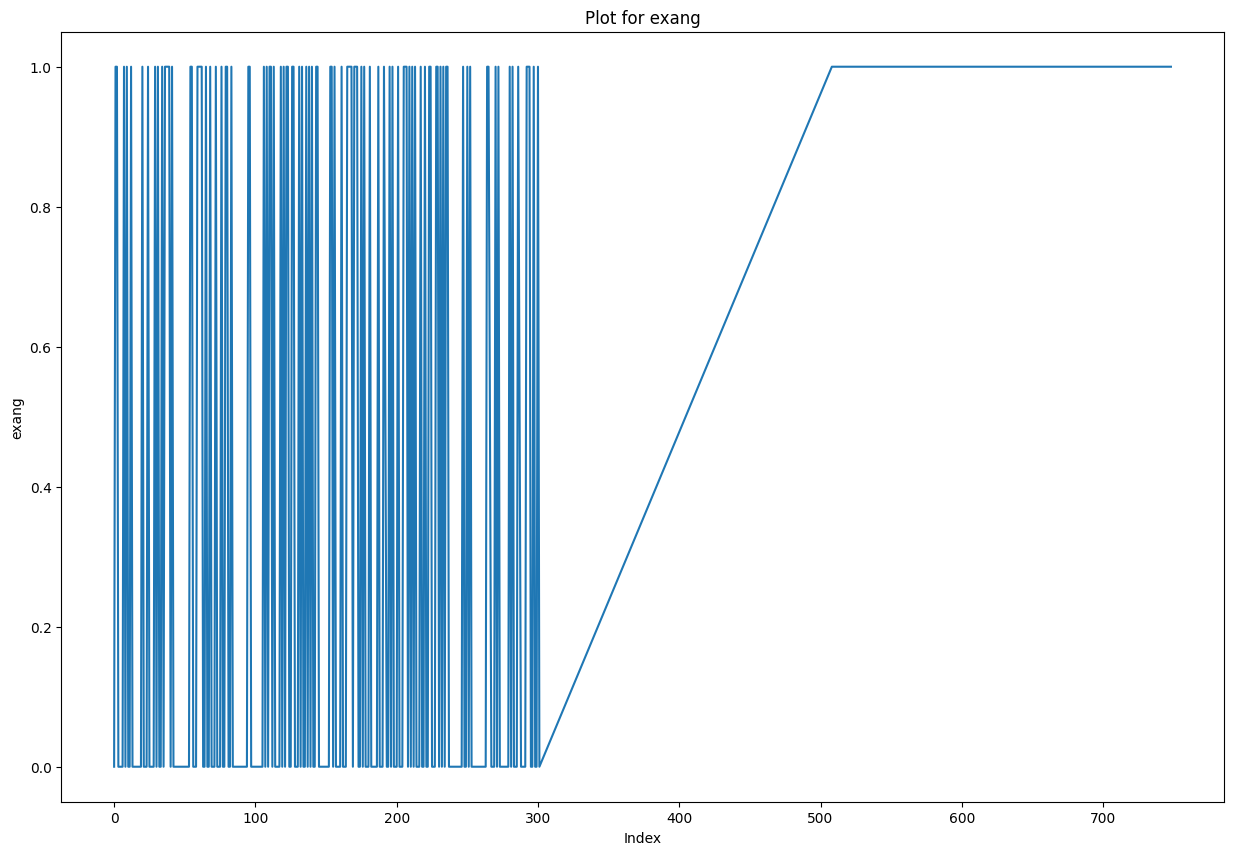

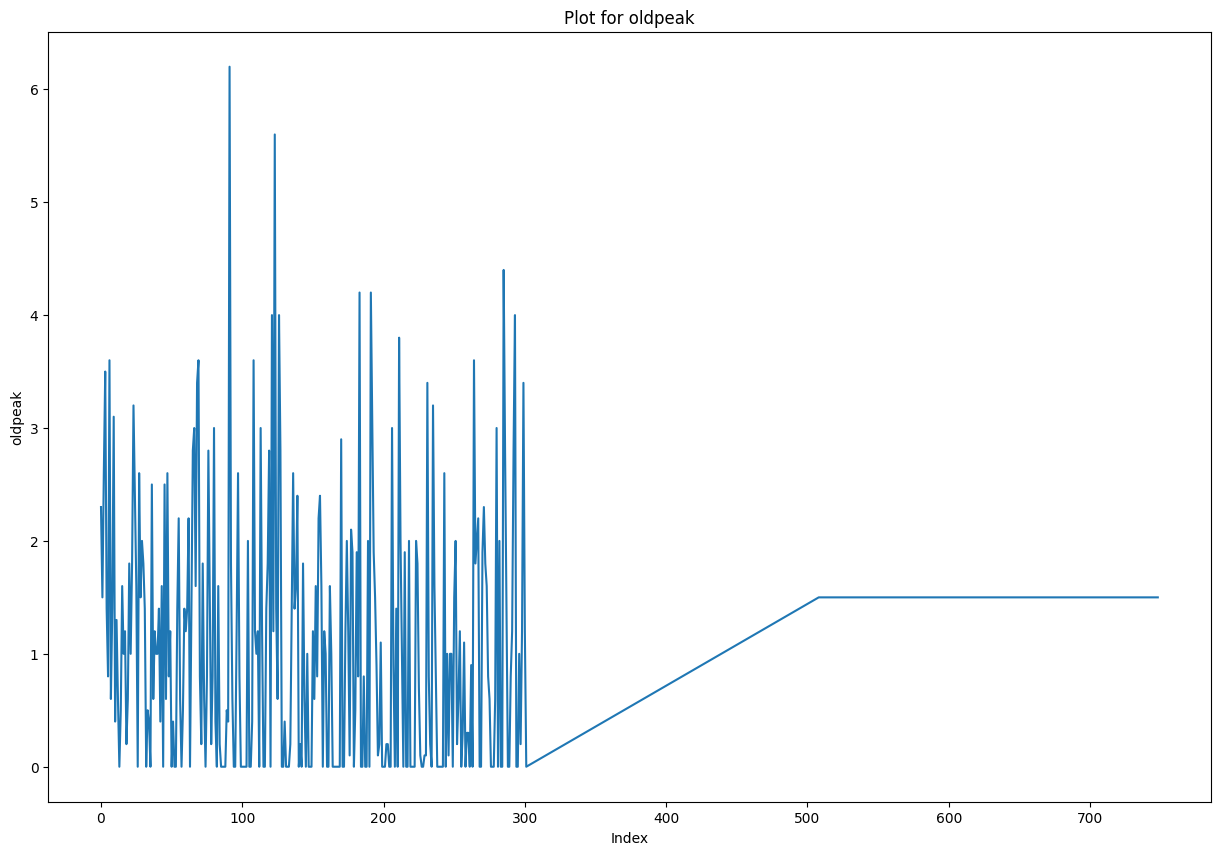

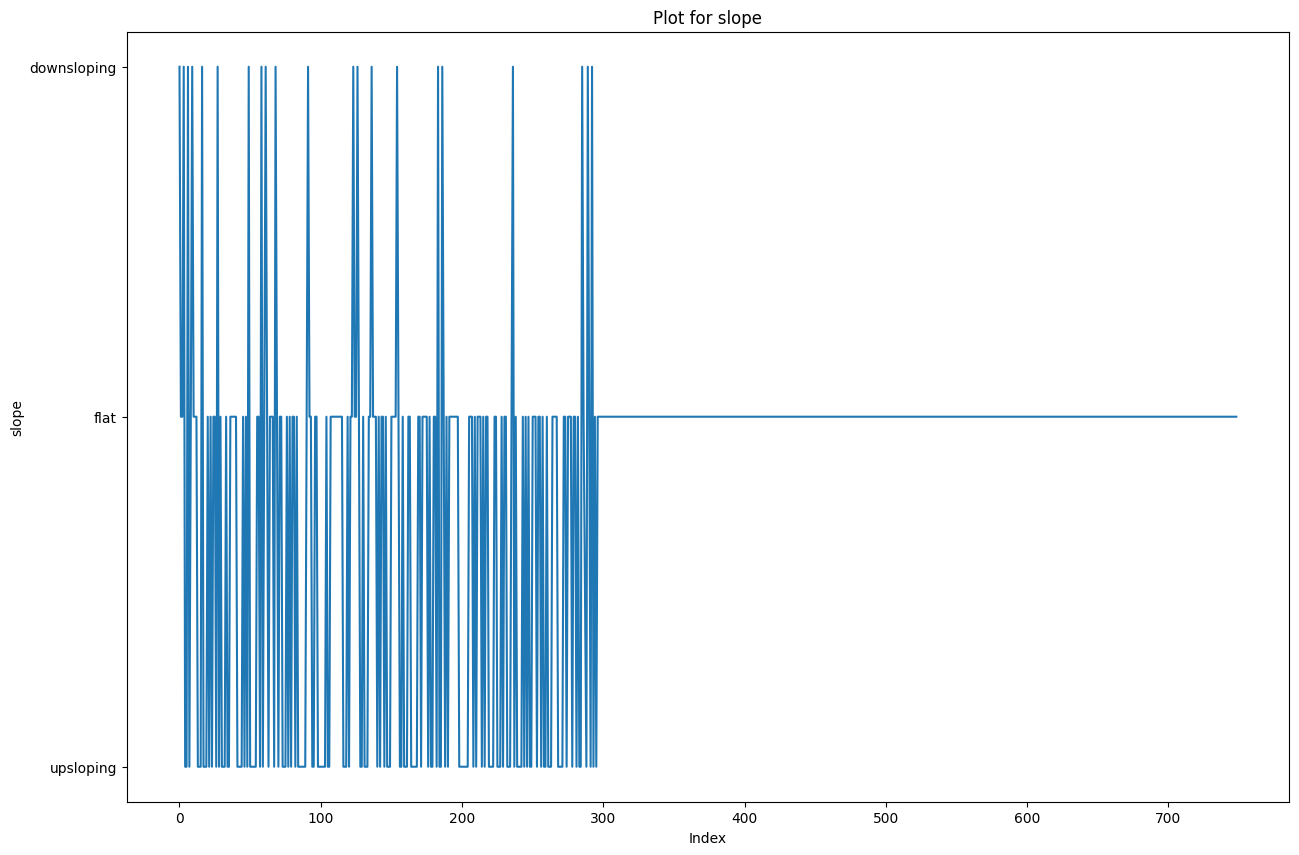

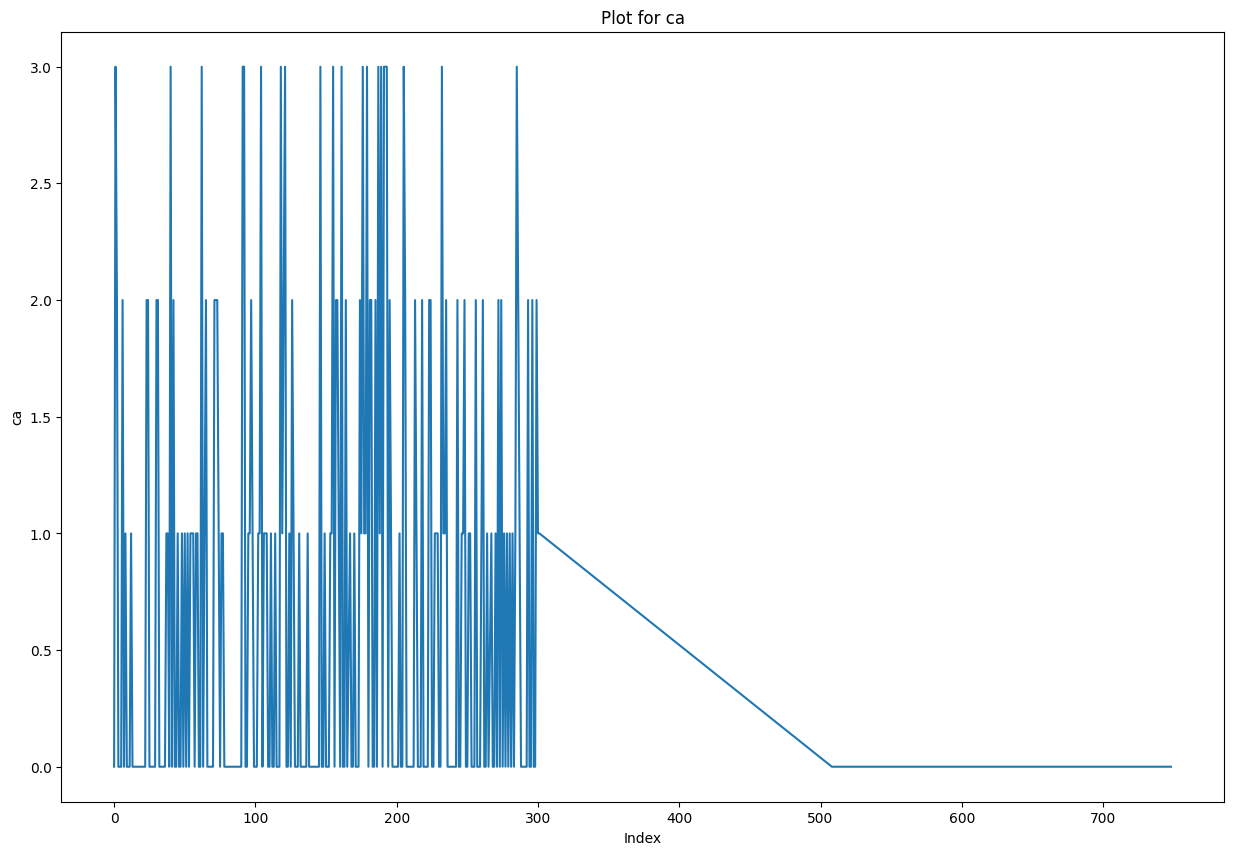

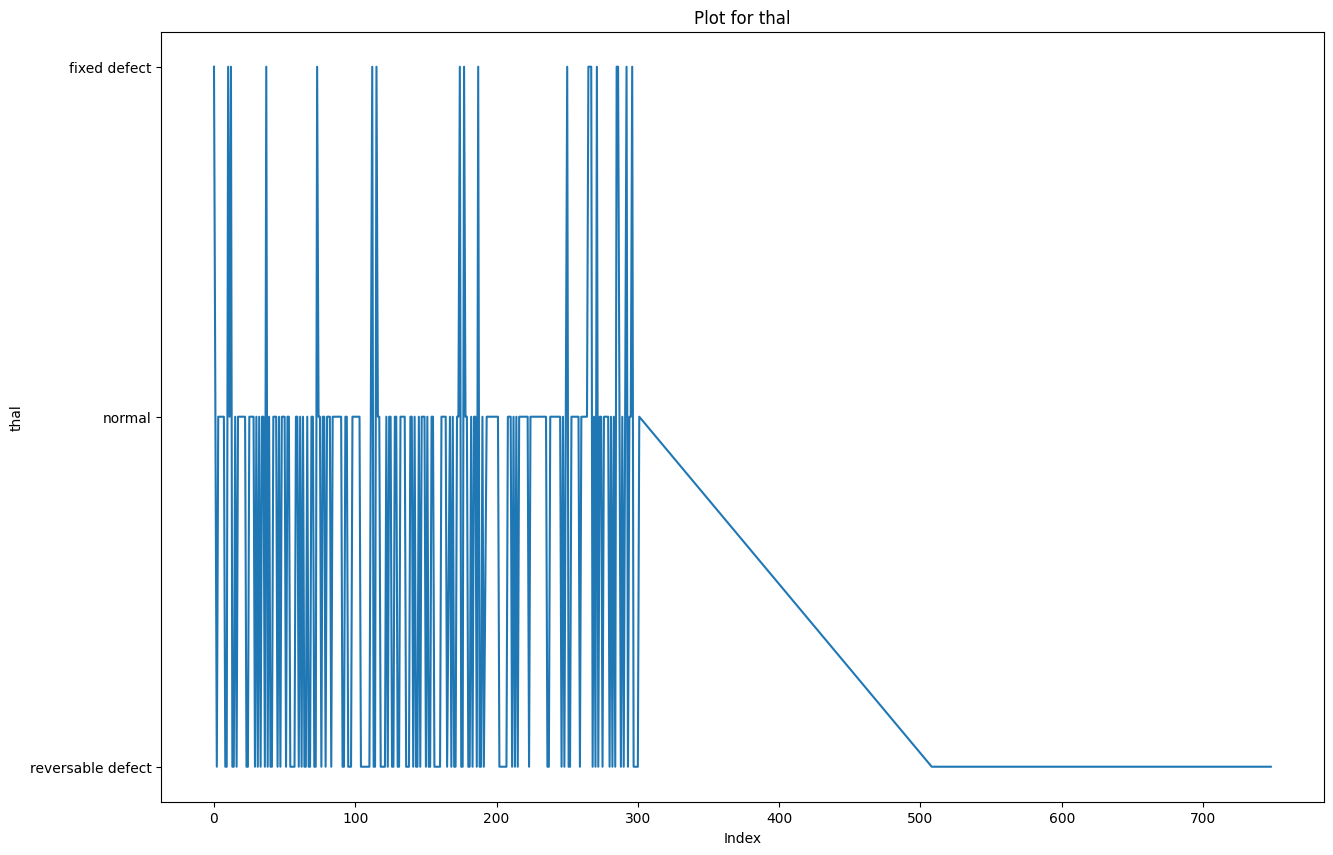

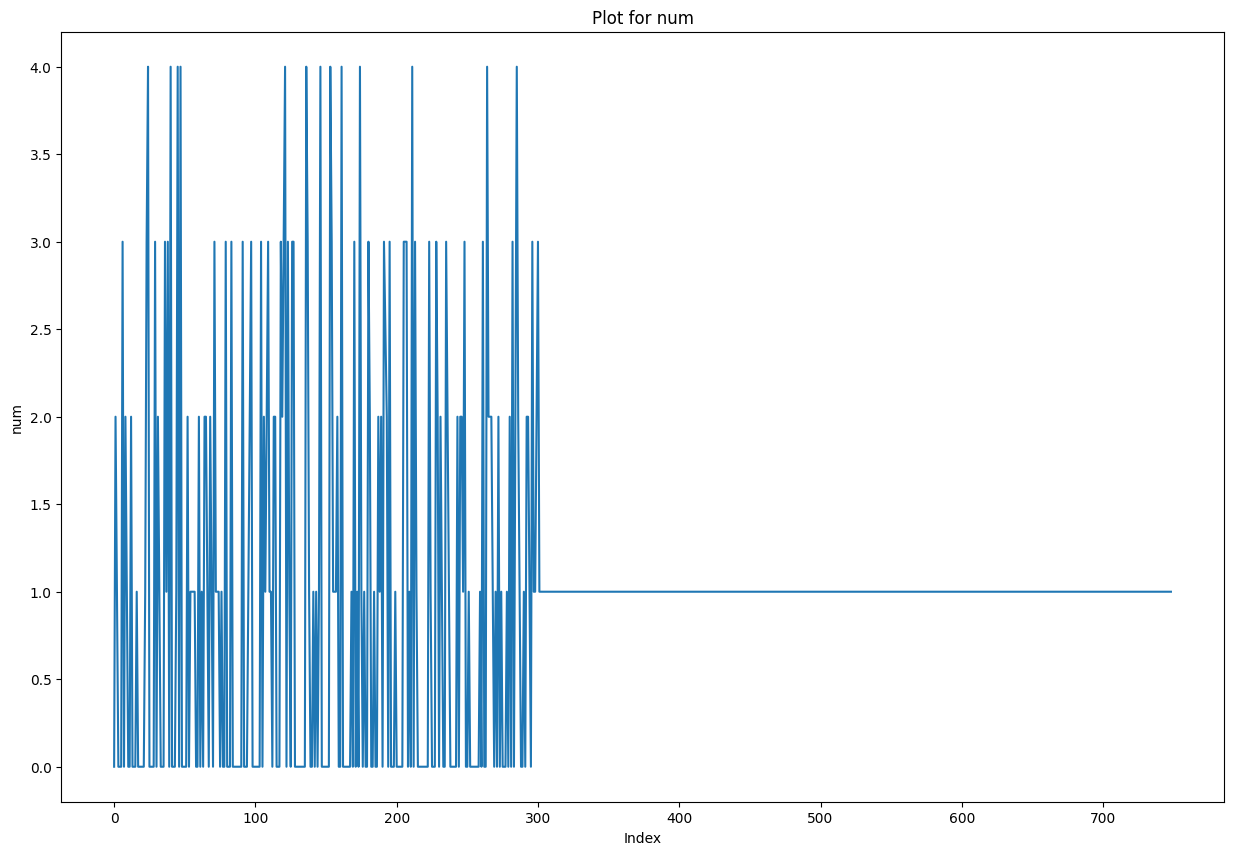

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('heart_disease_uci.csv')

# Перегляд перших кількох рядків даних
print(df.head())

# Перевірка на відсутні значення
print(df.isnull().sum())

# Очищення даних
# Видалення рядків або заповнення пропущених значень
df = df.dropna()  # або df.fillna(method='ffill')

# Перевірка на аномалії
# Виведення статистики даних
print(df.describe())

# Візуальний огляд розподілу значень для виявлення аномалій

# Гістограми для числових змінних
df.hist(bins=15, figsize=(15, 10))
plt.show()

# виявлення розподілу даних та викидів
# Точковий графік для візуального огляду розподілу даних та виявлення викидів

# Отримання списку стовпців, за винятком стовпця "id"
columns = [col for col in df.columns if col != 'id']

# Побудова окремого графіка для кожного стовпця
for column in columns:
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=df, x=df.index, y=column)
    plt.title(f'Plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()


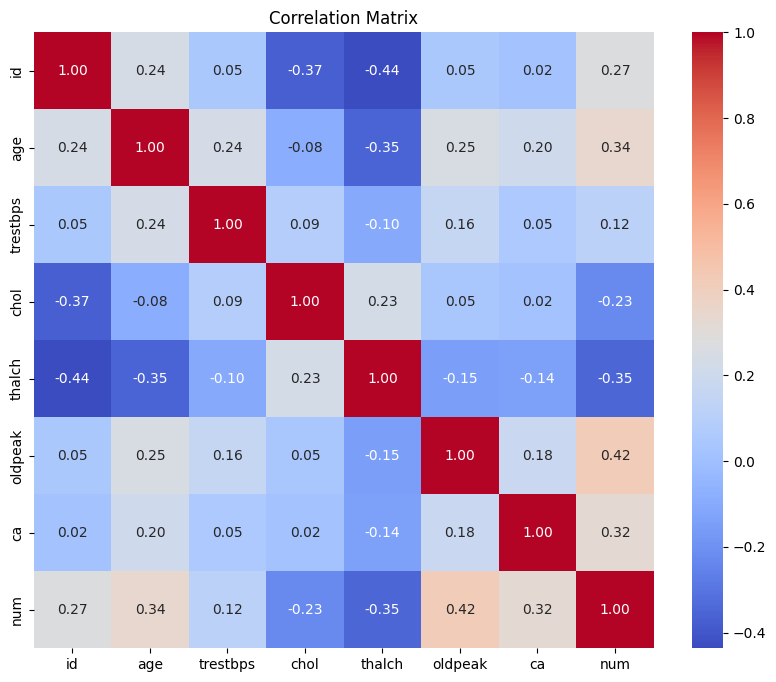

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('heart_disease_uci.csv')

# Перевірка на пропуски та заміна їх середніми значеннями для числових стовпців
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Вибірка лише числових стовпців для аналізу кореляції
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Побудова матриці кореляції
corr_matrix = numeric_data.corr()

# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


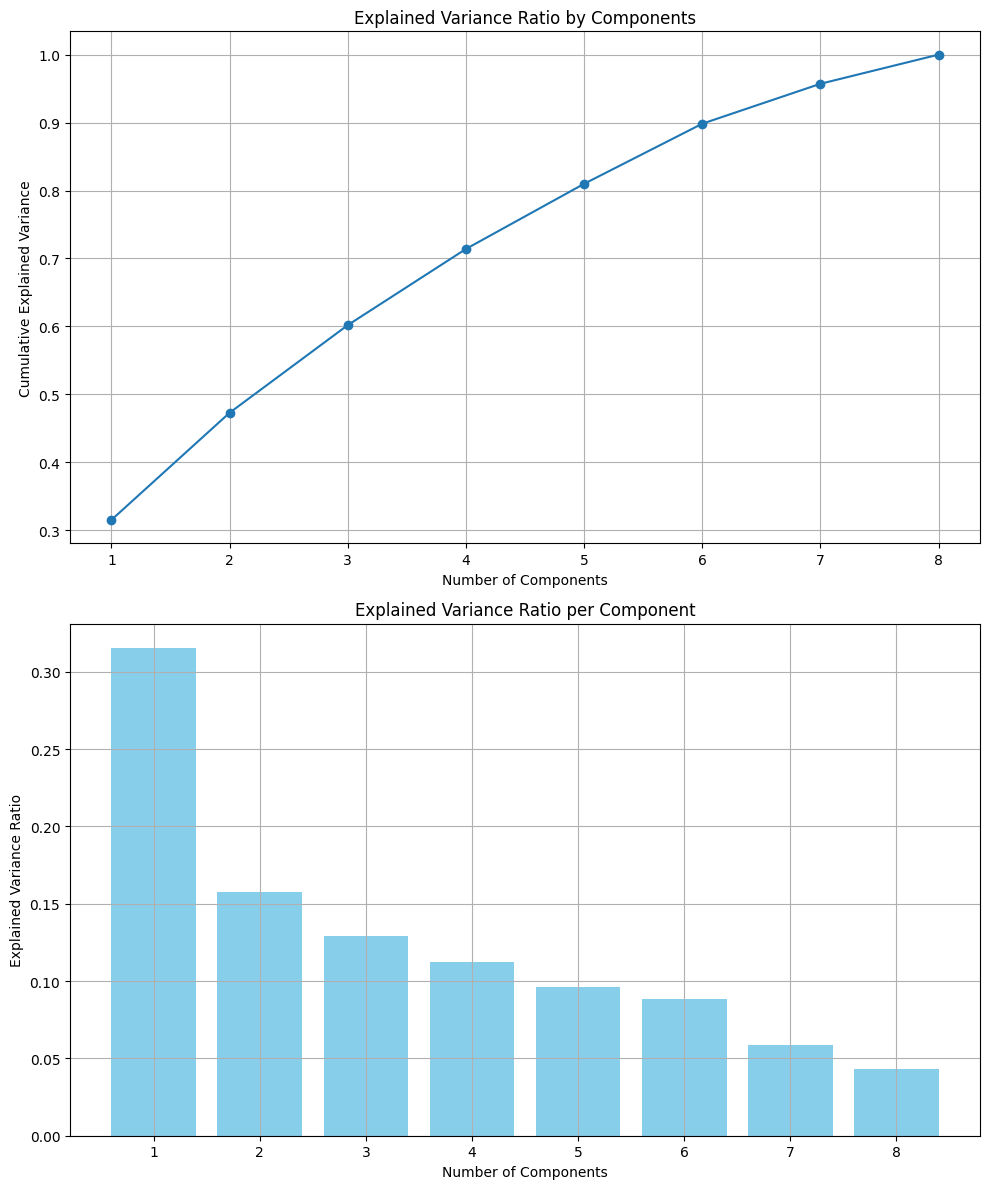

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('heart_disease_uci.csv')

# Видалення рядків з пропущеними значеннями
data.dropna(inplace=True)

# Вибірка числових ознак для аналізу
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Стандартизація даних
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Виконання PCA
pca = PCA()
pca.fit(scaled_data)

# Діапазон кількості компонентів для аналізу
n_components = range(1, len(pca.explained_variance_ratio_) + 1)

# Відображення кумулятивної дисперсії для визначення оптимальної кількості компонентів
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Верхній графік: кумулятивна дисперсія
ax1.plot(n_components, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Cumulative Explained Variance')
ax1.set_title('Explained Variance Ratio by Components')
ax1.grid(True)

# Нижній графік: дисперсія по кожній компоненті
ax2.bar(n_components, pca.explained_variance_ratio_, color='skyblue')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.set_title('Explained Variance Ratio per Component')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [4]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

# Завантаження даних
df = pd.read_csv('heart_disease_uci.csv')

app = Dash()

app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign': 'center'}),
    dcc.Dropdown(options=[{'label': dataset, 'value': dataset} for dataset in df['dataset'].unique()], value='Cleveland', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@app.callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df['dataset'] == value]
    return px.scatter(dff, x='age', y='chol', title=f'Cholesterol Levels by Age for {value}')

if __name__ == '__main__':
    app.run_server(debug=True)
